In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def zeta_j(j,u):
    zeta = np.sqrt(2)*np.sin(np.pi*j*u)
    return zeta

def epsilon_t(d, u):
    val = 0
    for j in range(1,d):
        Z = np.random.normal(0,1)
        den = 2**(j-1)
        val += (Z/den)*zeta_j(j,u)
    return val

In [6]:
T=100 # curves
m=85  # grid points
x_grid = np.linspace(0,1,m)
d=10  # curve process dimension

curves = np.zeros([m,T])

In [7]:
for t in range(100):
    curves[:,t] = epsilon_t(d, x_grid)

[]

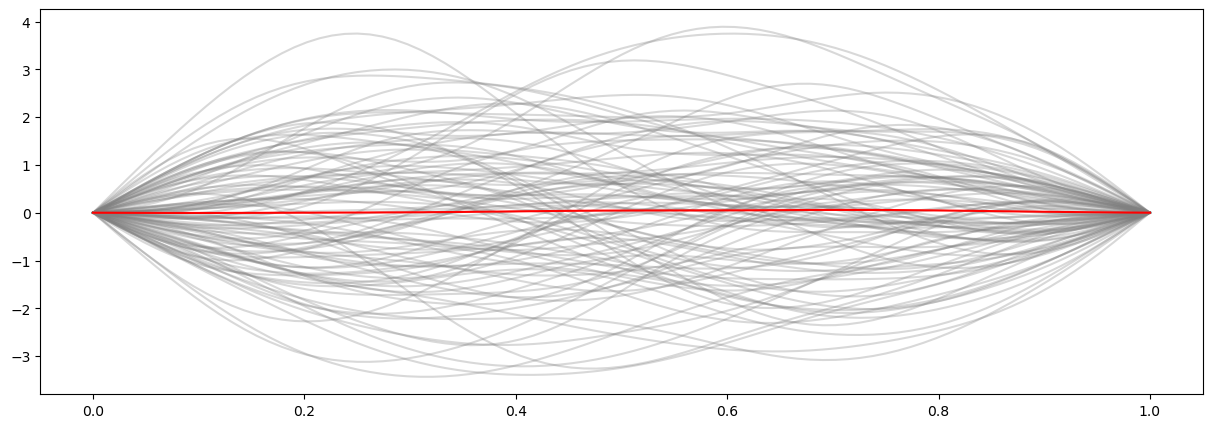

In [8]:
plt.figure(figsize=(15,5))

for t in range(T):
    plt.plot(x_grid, curves[:,t], c="gray", alpha=0.3)
plt.plot(x_grid, np.mean(curves, axis=1), c="red")

plt.plot()

In [9]:
import numpy as np

def simulate_model(T=100, m=85, d=10):
    """
    Simulates functional time series X_t(u) + epsilon_t(u)
    exactly as in the paper’s model (ξ_t AR(1) + wavelet-like noise).
    
    Parameters
    ----------
    T : int
        Number of time points
    m : int
        Number of grid points in [0,1]
    d : int
        Dimension of the functional process (number of φ_k)
        
    Returns
    -------
    X : array, shape (m, T)
        Signal curves
    eps : array, shape (m, T)
        Noise curves
    Y : array, shape (m, T)
        Observed functional time series
    """
    
    # grid in [0,1]
    u = np.linspace(0, 1, m)

    # basis functions φ_k(u) and ζ_j(u)
    phi = np.sqrt(2) * np.array([np.cos((k+1) * np.pi * u) for k in range(d)])      # shape (d, m)
    zeta = np.sqrt(2) * np.array([np.sin((j+1) * np.pi * u) for j in range(10)])     # shape (10, m)

    # coefficients: AR(1) for ξ_{t,k}
    a = np.array([(-1)**(k+1) * (0.9 - 0.5*(k+1)/d) for k in range(d)])  # AR coefficients
    
    xi = np.zeros((d, T))
    e = np.random.randn(d, T)                                           # innovations

    # Generate AR(1) process for ξ_t
    for k in range(d):
        for t in range(1, T):
            xi[k, t] = a[k] * xi[k, t-1] + e[k, t]

    # X_t(u) = sum ξ_{t,k} φ_k(u)
    X = phi.T @ xi                                                      # shape (m, T)

    # noise: ε_t(u) = Σ Z_tj / 2^{j/2} ζ_j(u)
    Z = np.random.randn(10, T)
    weights = Z / (2 ** (0.5 * (np.arange(10)[:, None] + 1)))           # (10,T)
    eps = zeta.T @ weights                                              # shape (m, T)

    # Observed process
    Y = X + eps
    
    return X, eps, Y, u

In [10]:
_, _, Y, u = simulate_model()

[]

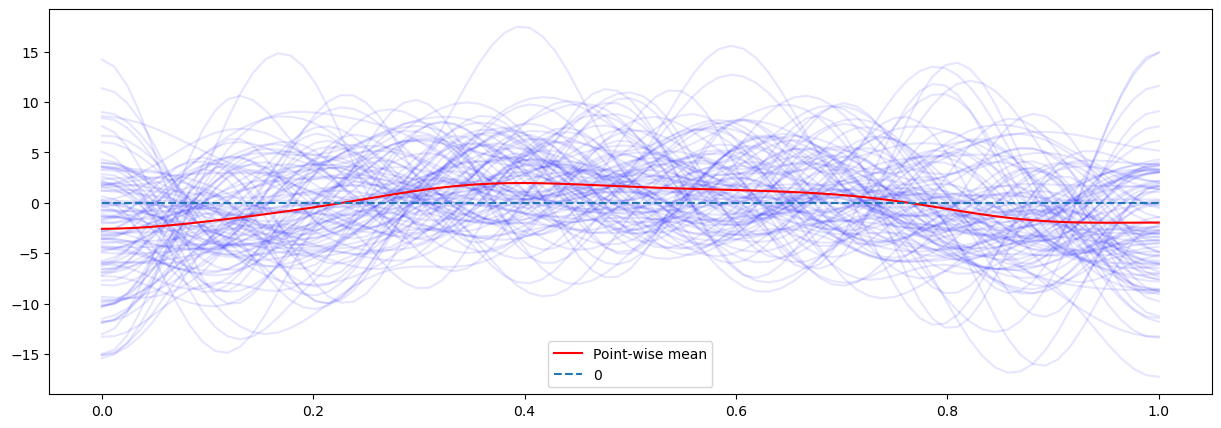

In [11]:
plt.figure(figsize=(15,5))
for t in range(Y.shape[1]):
    plt.plot(u, Y[:,t], c="blue", alpha=0.1)

plt.plot(u, np.mean(Y, axis=1), c="red", label="Point-wise mean")
plt.hlines(0, np.min(u), np.max(u), linestyle="--", label="0")

plt.legend()

plt.plot()